In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from branca.colormap import LinearColormap

df = pd.read_csv("summer.csv")
df_recent = df[(df['Year'] >= 2000) & (df['Year'] <= 2016)].dropna(subset=['Country', 'Medal'])


gold = df_recent[df_recent['Medal'] == 'Gold'].groupby('Country').size().reset_index(name='Gold')
total = df_recent.groupby('Country').size().reset_index(name='Total')
medals = pd.merge(gold, total, on='Country', how='outer').fillna(0)
country_mapping = {
    "USA": "United States of America",
    "UK": "United Kingdom",
    "KOR": "South Korea",
    "RUS": "Russia",
    "IRL": "Ireland",
    "CZE": "Czech Republic",
    "GER": "Germany",
    "GRE": "Greece",
    "SUI": "Switzerland",
    "URU": "Uruguay",
    "NED": "Netherlands",
    "CHN": "China",
    "AUS": "Australia",
    "CAN": "Canada",
    "FRA": "France",
    "JPN": "Japan",
    "ITA": "Italy",
    "BRA": "Brazil",
    "ESP": "Spain",
    "ARG": "Argentina",
    "MEX": "Mexico",
    "KEN": "Kenya",
    "ETH": "Ethiopia",
    "CMR": "Cameroon",
    "UKR": "Ukraine",
    "CUB": "Cuba",
    "ROU": "Romania",
    "THA": "Thailand",
    "IND": "India",
    "RSA": "South Africa",
    "JAM": "Jamaica"
}
medals['Country'] = medals['Country'].replace(country_mapping)


world = gpd.read_file(r"C:\Users\dzatk\Downloads\countries.geo.json")

world_medals = world.merge(medals, left_on='name', right_on='Country', how='left')
world_medals['Gold'] = world_medals['Gold'].fillna(0).astype(int)
world_medals['Total'] = world_medals['Total'].fillna(0).astype(int)
m = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodbpositron')

colormap = LinearColormap(
    colors=['#d73027', '#4575b4', '#1a9850'],
    vmin=0,
    vmax=world_medals['Gold'].max(),
    caption='Gold Medals (2000–2016)'
)
for _, row in world_medals.iterrows():
    feature = {
        "type": "Feature",
        "geometry": row['geometry'].__geo_interface__,
        "properties": {
            "name": row['name'],
            "Gold": row['Gold'],
            "Total": row['Total']
        }
    }

    folium.GeoJson(
        data=feature,
        style_function=lambda x, g=row['Gold']: {
            'fillColor': colormap(g),
            'color': 'black',
            'weight': 0.3,
            'fillOpacity': 0.7
        },
        tooltip=folium.GeoJsonTooltip(
            fields=['name', 'Gold', 'Total'],
            aliases=['Country:', 'Gold Medals:', 'Total Medals:'],
            localize=True,
            labels=True,
            sticky=True,
            style=(
                "background-color: white; color: black; font-family: Arial; "
                "font-size: 12px; padding: 6px;"
            )
        )
    ).add_to(m)
colormap.add_to(m)

# Save to HTML
m.save("olympic_medals_interactive_map.html")


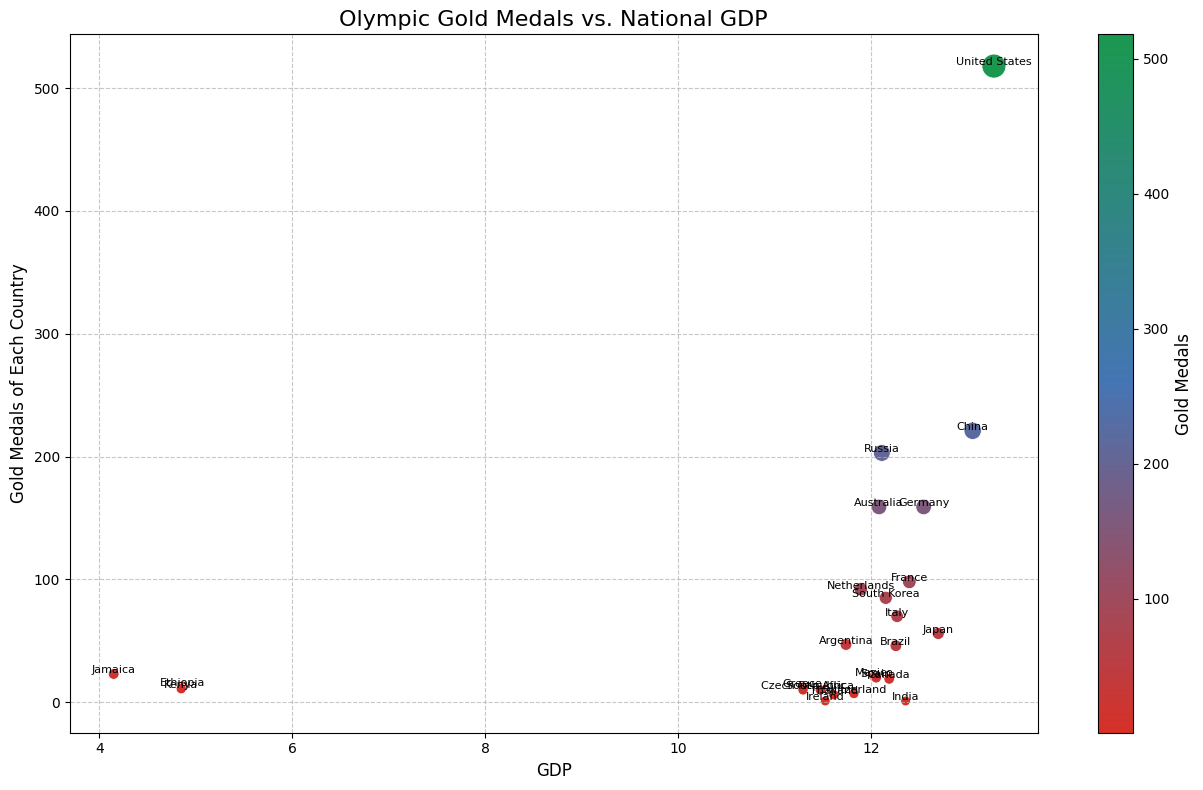

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

df = pd.read_csv("summer.csv")
df_recent = df[(df['Year'] >= 2000) & (df['Year'] <= 2016)]
gold = df_recent[df_recent['Medal'] == 'Gold']

gold_counts = gold['Country'].value_counts().reset_index()
gold_counts.columns = ['Country', 'Gold_Medals']
country_mapping = {
    "USA": "United States",
    "UK": "United Kingdom",
    "KOR": "South Korea",
    "RUS": "Russia",
    "IRL": "Ireland",
    "CZE": "Czech Republic",
    "GER": "Germany",
    "GRE": "Greece",
    "SUI": "Switzerland",
    "URU": "Uruguay",
    "NED": "Netherlands",
    "CHN": "China",
    "AUS": "Australia",
    "CAN": "Canada",
    "FRA": "France",
    "JPN": "Japan",
    "ITA": "Italy",
    "BRA": "Brazil",
    "ESP": "Spain",
    "ARG": "Argentina",
    "MEX": "Mexico",
    "KEN": "Kenya",
    "ETH": "Ethiopia",
    "CMR": "Cameroon",
    "UKR": "Ukraine",
    "CUB": "Cuba",
    "ROU": "Romania",
    "THA": "Thailand",
    "IND": "India",
    "RSA": "South Africa",
    "JAM": "Jamaica"
}
gold_counts['Country'] = gold_counts['Country'].replace(country_mapping)

gdp = pd.read_csv(r"C:\Users\dzatk\OneDrive\Documents\gdp_2016.csv")  # Your file path
data = pd.merge(gold_counts, gdp, on='Country', how='left').dropna()

data['Log_GDP'] = np.log10(data['GDP'])
data['Label'] = data['Country']

colors = ['#d73027', '#4575b4', '#1a9850']
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

norm = Normalize(vmin=data['Gold_Medals'].min(), vmax=data['Gold_Medals'].max())
fig, ax = plt.subplots(figsize=(13, 8))

scatter = sns.scatterplot(
    data=data,
    x='Log_GDP',
    y='Gold_Medals',
    hue='Gold_Medals',
    palette=cmap,
    size='Gold_Medals',
    sizes=(50, 300),
    legend=False,
    ax=ax 
)
for i in range(len(data)):
    ax.text(
        data['Log_GDP'].iloc[i],
        data['Gold_Medals'].iloc[i] + 0.5,
        data['Label'].iloc[i],
        ha='center',
        fontsize=8
    )

# Add colorbar
cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Gold Medals', fontsize=12)

# Final touches
ax.set_title("Olympic Gold Medals vs. National GDP", fontsize=16)
ax.set_xlabel("GDP", fontsize=12)
ax.set_ylabel("Gold Medals of Each Country", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


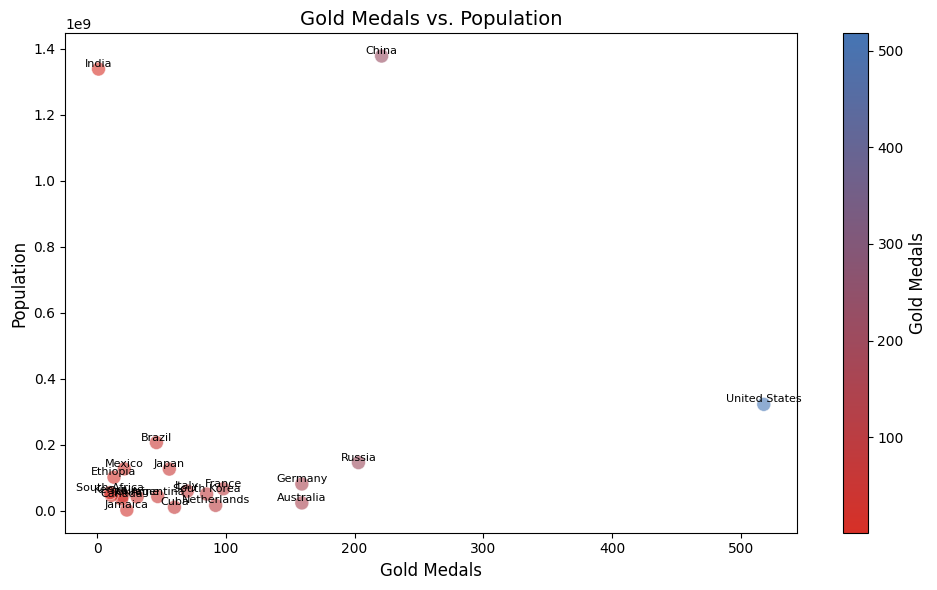

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
data = pd.merge(gold_counts, pop_data, on='Country', how='left').dropna()

cmap = LinearSegmentedColormap.from_list("red_to_blue", ['#d73027', '#4575b4'])

norm = Normalize(vmin=data['Gold_Medals'].min(), vmax=data['Gold_Medals'].max())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Gold_Medals'], data['Population (2016)'], c=data['Gold_Medals'], cmap=cmap, s=100, alpha=0.6, edgecolors="w", linewidth=0.5)

for i in range(len(data)):
    plt.text(data['Gold_Medals'].iloc[i], data['Population (2016)'].iloc[i], data['Country'].iloc[i], fontsize=8, ha='center', va='bottom')

cbar = plt.colorbar(ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca())
cbar.set_label('Gold Medals', fontsize=12)

plt.xlabel('Gold Medals', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.title('Gold Medals vs. Population', fontsize=14)
plt.tight_layout()
plt.show()


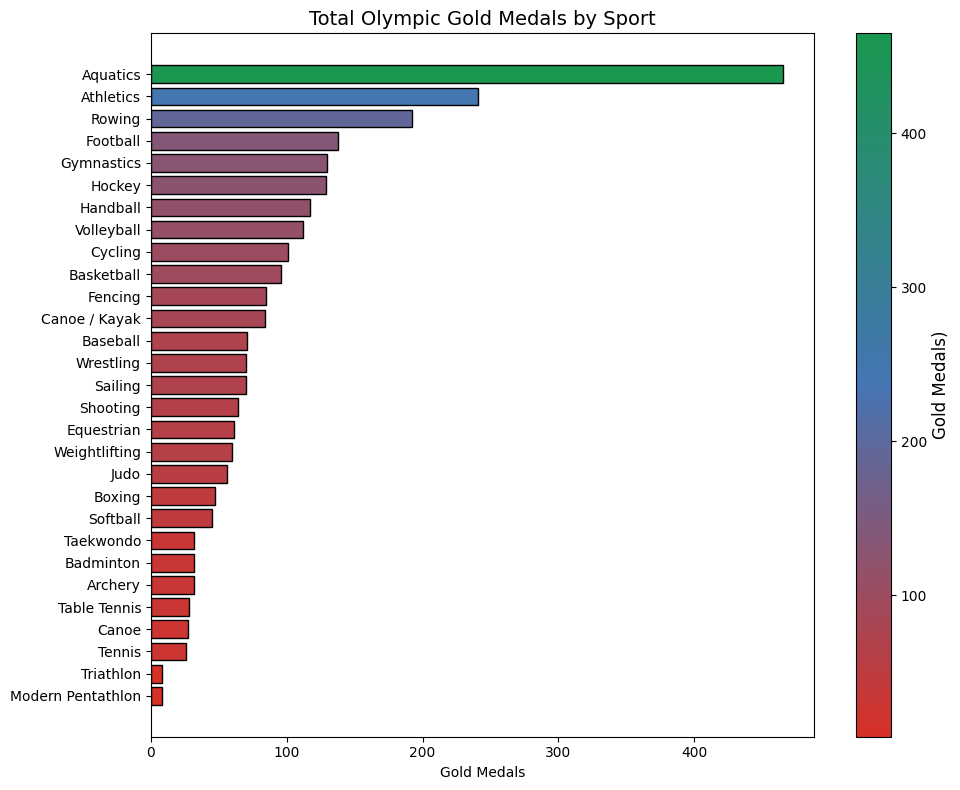

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable

df = pd.read_csv("summer.csv")
df_recent = df[(df['Year'] >= 2000) & (df['Year'] <= 2016)]
gold = df_recent[df_recent['Medal'] == 'Gold']

sport_counts = gold['Sport'].value_counts().reset_index()
sport_counts.columns = ['Sport', 'Gold_Medals']
sport_counts = sport_counts.sort_values('Gold_Medals', ascending=True)

colors = ['#d73027', '#4575b4', '#1a9850']
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
norm = Normalize(vmin=sport_counts['Gold_Medals'].min(), vmax=sport_counts['Gold_Medals'].max())
bar_colors = [cmap(norm(value)) for value in sport_counts['Gold_Medals']]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(sport_counts['Sport'], sport_counts['Gold_Medals'], color=bar_colors, edgecolor='black')
sm = ScalarMappable(norm=norm, cmap=cmap)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Gold Medals)', fontsize=12)
ax.set_xlabel('Gold Medals')
ax.set_title('Total Olympic Gold Medals by Sport', fontsize=14)
plt.tight_layout()
plt.show()
